# To analyze the reviews and ratings received by top and least performing restaurants of Singapore. 

In [1]:
from random import randint
from time import sleep
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd

# Extracting restaurant related data from tripadvisor website for a count of approximately 3000+ restaurants 

In [2]:
link="https://www.tripadvisor.com.sg/RestaurantSearch-g294265-oa{}-zfp10600-Singapore.html"
restaurant_name_list = []
ratings_list = []
reviews_count = []
top_reviews =[]
for i in range(30,3000,30):
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36'}
    html = requests.get(link.format(i),headers=headers)
    print('Page_Size', i)
    sleep(randint(1,5))
    bsobj = soup(html.content,'lxml')
    for name in bsobj.findAll('div',{'class':'RfBGI'}):
        restaurant_name_list.append(name.text.strip())
    for rating in bsobj.findAll('svg',{'class':'UctUV d H0'}):
        ratings_list.append(rating['aria-label'])
    for review_count in bsobj.findAll('span',{'class':'IiChw'}):
        reviews_count.append(review_count.text.strip())
    for review in bsobj.findAll('div',{'class':'EGgBc Ci'}):
        top_reviews.append(review.text.strip())

Page_Size 30
Page_Size 60
Page_Size 90
Page_Size 120
Page_Size 150
Page_Size 180
Page_Size 210
Page_Size 240
Page_Size 270
Page_Size 300
Page_Size 330
Page_Size 360
Page_Size 390
Page_Size 420
Page_Size 450
Page_Size 480
Page_Size 510
Page_Size 540
Page_Size 570
Page_Size 600
Page_Size 630
Page_Size 660
Page_Size 690
Page_Size 720
Page_Size 750
Page_Size 780
Page_Size 810
Page_Size 840
Page_Size 870
Page_Size 900
Page_Size 930
Page_Size 960
Page_Size 990
Page_Size 1020
Page_Size 1050
Page_Size 1080
Page_Size 1110
Page_Size 1140
Page_Size 1170
Page_Size 1200
Page_Size 1230
Page_Size 1260
Page_Size 1290
Page_Size 1320
Page_Size 1350
Page_Size 1380
Page_Size 1410
Page_Size 1440
Page_Size 1470
Page_Size 1500
Page_Size 1530
Page_Size 1560
Page_Size 1590
Page_Size 1620
Page_Size 1650
Page_Size 1680
Page_Size 1710
Page_Size 1740
Page_Size 1770
Page_Size 1800
Page_Size 1830
Page_Size 1860
Page_Size 1890
Page_Size 1920
Page_Size 1950
Page_Size 1980
Page_Size 2010
Page_Size 2040
Page_Size 2070
P

# Storing colllected list of values into pandas dataframe

In [5]:
df5 =pd.DataFrame({'restaurant_name': restaurant_name_list})
df6 =pd.DataFrame({'ratings': ratings_list})
df7 =pd.DataFrame({'review_count': reviews_count})
df8 =pd.DataFrame({'top_reviews': top_reviews})

# Merging all dataframes into sigle dataframe 

In [6]:
restaurant_final_df = pd.concat([df5,df6,df7,df8], axis="columns")
restaurant_final_df

,restaurant_name,ratings,review_count,top_reviews
0,Kumo Japanese Dining Ala Carte Buffet,4.0 of 5 bubbles,8 reviews,“Dinner with friend”“Very good food and amazin...
1,31. Si Chuan Dou Hua Restaurant,4.5 of 5 bubbles,200 reviews,“Celebrating Wedding Anniversary”“Friendly and...
2,32. Kucina Italian Restaurant,4.5 of 5 bubbles,197 reviews,“Pleasantly surprised with the service and...”...
3,33. The Dim Sum Place,4.5 of 5 bubbles,226 reviews,“Amazing food !”“Love the siew mai”
4,34. PS.Cafe at Palais Renaissance,4.5 of 5 bubbles,416 reviews,“Great service and wonderful experience...”“Ni...
...,...,...,...,...
3634,27. Vatan Se,NaN,NaN,NaN
3635,28. Byblos Grill,NaN,NaN,NaN
3636,29. Ginger,NaN,NaN,NaN
3637,30. PIPES by HATTENDO,NaN,NaN,NaN


# Data Cleaning

In [11]:
import re
from cleantext import clean
new_restaurant_name_list=[]
new_ratings_list=[]
new_reviews_count=[]
new_top_reviews=[]
for name in restaurant_name_list:
    a=re.sub('^[0-9]*.','',name)
    new_restaurant_name_list.append(a.strip())
for rating in ratings_list:
    a=re.sub('of 5 bubbles','',rating)
    new_ratings_list.append(float(a.strip()))
for count in reviews_count:
    a=re.sub('reviews|,|review','',count)
    new_reviews_count.append(int(a.strip()))
for review in top_reviews:
    review=clean(review, no_emoji=True)
    a=re.sub('[”|“|!|@|.|$|*|&|,|"|"]',' ',review)
    new_top_reviews.append(a.strip())

In [15]:
df9 =pd.DataFrame({'restaurant_name': new_restaurant_name_list})
df10 =pd.DataFrame({'ratings': new_ratings_list})
df11=pd.DataFrame({'review_count': new_reviews_count})
df12 =pd.DataFrame({'top_reviews': new_top_reviews})

In [16]:
cleaned_restaurant_final_df = pd.concat([df9,df10,df11,df12], axis="columns")
cleaned_restaurant_final_df

,restaurant_name,ratings,review_count,top_reviews
0,umo Japanese Dining Ala Carte Buffet,4.0,8.0,dinner with friend very good food and amazing...
1,Si Chuan Dou Hua Restaurant,4.5,200.0,celebrating wedding anniversary friendly and ...
2,Kucina Italian Restaurant,4.5,197.0,pleasantly surprised with the service and ...
3,The Dim Sum Place,4.5,226.0,amazing food love the siew mai
4,PS.Cafe at Palais Renaissance,4.5,416.0,great service and wonderful experience nic...
...,...,...,...,...
3634,Vatan Se,NaN,NaN,NaN
3635,Byblos Grill,NaN,NaN,NaN
3636,Ginger,NaN,NaN,NaN
3637,PIPES by HATTENDO,NaN,NaN,NaN


In [17]:
cleaned_restaurant_final_df=cleaned_restaurant_final_df.dropna()
cleaned_restaurant_final_df

,restaurant_name,ratings,review_count,top_reviews
0,umo Japanese Dining Ala Carte Buffet,4.0,8.0,dinner with friend very good food and amazing...
1,Si Chuan Dou Hua Restaurant,4.5,200.0,celebrating wedding anniversary friendly and ...
2,Kucina Italian Restaurant,4.5,197.0,pleasantly surprised with the service and ...
3,The Dim Sum Place,4.5,226.0,amazing food love the siew mai
4,PS.Cafe at Palais Renaissance,4.5,416.0,great service and wonderful experience nic...
...,...,...,...,...
3589,G Taps,4.5,189.0,lunch meet vatan se food
3590,G7 Sin Ma Live Seafood Restaurant,4.5,470.0,amazing food experience great food and atmosp...
3591,Wine & Chef,4.5,243.0,please maintain the standard make e dinne...
3592,Borscht.sg,4.5,109.0,pure matcha latte bliss japanese dining


In [18]:
cleaned_restaurant_final_df.to_csv('Cleaned_Restaurant_Information.csv')

In [25]:
cleaned_restaurant_final_df.describe()

,ratings,review_count
count,3594.000000,3594.000000
mean,4.466055,311.379521
std,0.456989,323.017619
min,1.000000,1.000000
25%,4.500000,98.000000
50%,4.500000,206.000000
75%,4.500000,446.000000
max,5.000000,1758.000000


# Applying NLTK Techniques to identify key patterns in the dataset extracted

In [29]:
import nltk
from nltk import word_tokenize, Text
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [21]:
word_list=[]
consolidated_reviews=' '.join(new_top_reviews)
lem=WordNetLemmatizer()
lem_tokens=lem.lemmatize(consolidated_reviews.lower())
file_tokens = word_tokenize(lem_tokens)
for i in file_tokens:
    if len(i)>7:
        word_list.append(i)
data_count = nltk.FreqDist(word_list)
print(data_count.most_common(10))

[('experience', 461), ('excellent', 332), ('delicious', 309), ('birthday', 296), ('restaurant', 274), ('delivery', 190), ('singapore', 176), ('favorite', 146), ('authentic', 97), ('absolutely', 93)]


In [26]:
tokens=nltk.word_tokenize(consolidated_reviews)
tokens[:10]

['dinner',
 'with',
 'friend',
 'very',
 'good',
 'food',
 'and',
 'amazing',
 'service',
 'celebrating']

In [27]:
pos_tagged_set=nltk.pos_tag(tokens,tagset='universal')
pos_tagged_set[:10]

[('dinner', 'NOUN'),
 ('with', 'ADP'),
 ('friend', 'ADJ'),
 ('very', 'ADV'),
 ('good', 'ADJ'),
 ('food', 'NOUN'),
 ('and', 'CONJ'),
 ('amazing', 'ADJ'),
 ('service', 'NOUN'),
 ('celebrating', 'VERB')]

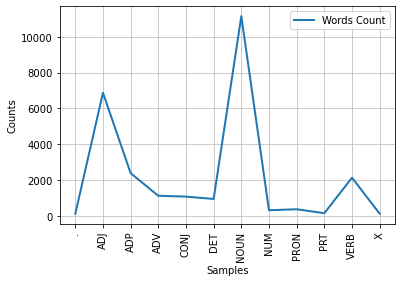

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [28]:
complete_set=[]
Pos_tag_map=[('Words Count',j[1]) for j in pos_tagged_set]
complete_set.extend(Pos_tag_map)
common_pos=nltk.ConditionalFreqDist(complete_set)
common_pos.plot()

# Sentimental analysis of Reviews

In [30]:
siao=SentimentIntensityAnalyzer()

In [31]:
siao.polarity_scores(consolidated_reviews)

{'neg': 0.019, 'neu': 0.423, 'pos': 0.558, 'compound': 1.0}

In [32]:
result_dict={}
for i,row in tqdm(cleaned_restaurant_final_df.iterrows(),  total=len(cleaned_restaurant_final_df)):
    review=row['top_reviews']
    name=row['restaurant_name']
    result_dict[name]=siao.polarity_scores(review)

  0%|          | 0/3594 [00:00<?, ?it/s]

In [35]:
review_sentiment_df=pd.DataFrame(result_dict).T

In [38]:
review_sentiment_df

,neg,neu,pos,compound
umo Japanese Dining Ala Carte Buffet,0.0,0.328,0.672,0.8481
Si Chuan Dou Hua Restaurant,0.0,0.619,0.381,0.5719
Kucina Italian Restaurant,0.0,0.615,0.385,0.6124
The Dim Sum Place,0.0,0.333,0.667,0.8402
PS.Cafe at Palais Renaissance,0.0,0.259,0.741,0.9360
...,...,...,...,...
The Curry Culture,0.0,0.500,0.500,0.7184
Vatan Se,0.0,0.368,0.632,0.9186
Byblos Grill,0.0,0.315,0.685,0.8271
Ginger,0.0,0.413,0.587,0.7964


# Removing stop words from reviews

In [39]:
from nltk.tokenize import word_tokenize

In [40]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [53]:
from wordcloud import WordCloud,STOPWORDS

In [55]:
filtered_list=[]
for words in tokens:
    if words not in stop_words:
        filtered_list.append(words)
filtered_stop_words_text=' '.join(filtered_list)
print(filtered_stop_words_text)

dinner friend good food amazing service celebrating wedding anniversary friendly helpful staff pleasantly surprised service second none experience amazing food love siew mai great service wonderful experience nice ambience delicious food worth ok good birthday dinner reasonable price good quality friendly service flavourful food great service good food value money good place meal solo friends amazing food service dinner friday good food great service desserts brunch really great food service good food good value set meal value money nice service yummy dishes lunch gathering garlic butter yum service exceptional still best fantastic awesome prompt efficient delivery bento delivery customers tasty food nice ambience good service good food ambience good food atmosphere conducive patara dine thai excelent experience amazing food fair healthy delicious vegan options birthday chill margarita monday taco tuesdays happy hour nice vegetarian meal good old restaurant delicious flavours - highly 

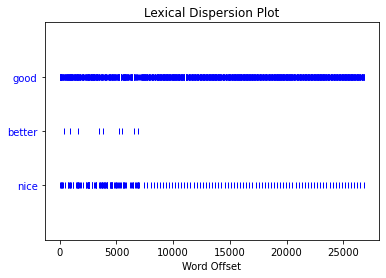

In [59]:
%matplotlib inline
from nltk import word_tokenize, Text
text = Text(file_tokens)
text.dispersion_plot(['good','better','nice'])

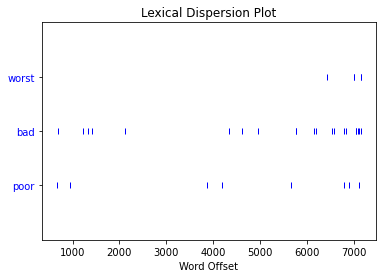

In [61]:
text = Text(file_tokens)
text.dispersion_plot(['worst','bad','poor'])

In [68]:
from nltk import FreqDist
filtered_lem_tokens=lem.lemmatize(filtered_stop_words_text.lower())
filtered_file_tokens = word_tokenize(filtered_lem_tokens)
filtered_text = Text(filtered_file_tokens)
Frequency_distribution = FreqDist(filtered_text)
Frequency_distribution.most_common(10)

[('food', 1805),
 ('great', 1252),
 ('good', 1121),
 ('service', 1023),
 ('experience', 461),
 ('amazing', 425),
 ('dinner', 421),
 ('excellent', 332),
 ('delicious', 309),
 ('birthday', 296)]

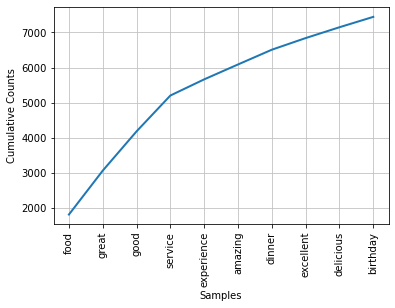

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [69]:
Frequency_distribution.plot(10, cumulative=True)

In [62]:
stopwords=STOPWORDS
word_cloud= WordCloud(background_color='yellow', stopwords = stopwords, height=1000,width=1000)
word_cloud.generate(filtered_stop_words_text)

In [47]:
word_cloud.to_file('word_cloud.png')

# Data Visualization

Text(0, 0.5, 'Total rating count')

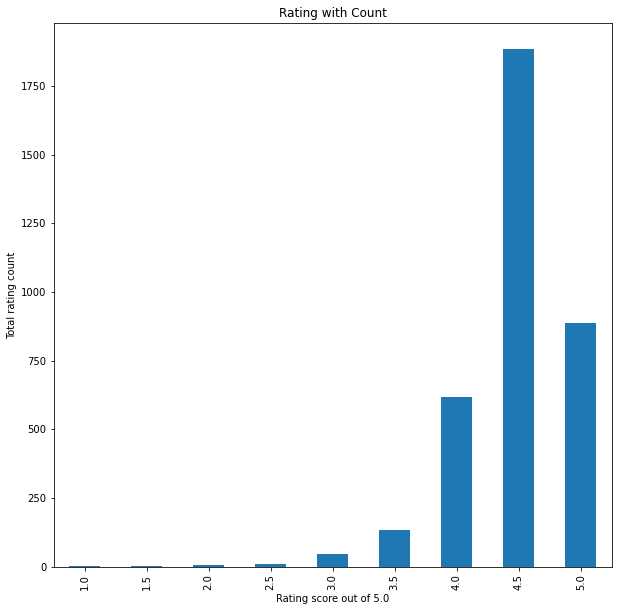

In [54]:
axis = cleaned_restaurant_final_df['ratings'].value_counts().sort_index().plot(kind= 'bar', title="Rating with Count", figsize=(10,10))
axis.set_xlabel('Rating score out of 5.0')
axis.set_ylabel('Total rating count')

# MYSQL for data extraction to categorize information based on performance of restaurants

In [72]:
import sqlite3 as sql

In [73]:
conn = sql.connect('default.db')

In [ ]:
cleaned_restaurant_final_df.to_sql('sql_table', conn)

In [89]:
cleaned_restaurant_final_df

,restaurant_name,ratings,review_count,top_reviews
0,umo Japanese Dining Ala Carte Buffet,4.0,8.0,dinner with friend very good food and amazing...
1,Si Chuan Dou Hua Restaurant,4.5,200.0,celebrating wedding anniversary friendly and ...
2,Kucina Italian Restaurant,4.5,197.0,pleasantly surprised with the service and ...
3,The Dim Sum Place,4.5,226.0,amazing food love the siew mai
4,PS.Cafe at Palais Renaissance,4.5,416.0,great service and wonderful experience nic...
...,...,...,...,...
3589,G Taps,4.5,189.0,lunch meet vatan se food
3590,G7 Sin Ma Live Seafood Restaurant,4.5,470.0,amazing food experience great food and atmosp...
3591,Wine & Chef,4.5,243.0,please maintain the standard make e dinne...
3592,Borscht.sg,4.5,109.0,pure matcha latte bliss japanese dining


# Analyzing Top - Rated Reviews

In [100]:
query = 'select * from sql_table where ratings ="5.0"'
Top_restaurants_df = pd.read_sql(query, conn)

In [94]:
Top_reviews_list=[]
Top_reviews_list = Top_restaurants_df['top_reviews'].values.tolist()

In [96]:
Top_reviews_text=' '.join(Top_reviews_list)

In [106]:
top_filtered_lem_tokens=lem.lemmatize(Top_reviews_text.lower())
top_filtered_file_tokens = word_tokenize(top_filtered_lem_tokens)
top_filtered_text = Text(top_filtered_file_tokens)
Top_Frequency_distribution = FreqDist(top_filtered_text)
Top_Frequency_distribution.most_common(5)

[('good', 372),
 ('food', 315),
 ('great', 301),
 ('experience', 218),
 ('restaurant', 217)]

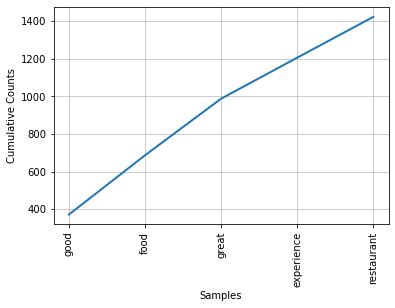

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [107]:
Top_Frequency_distribution.plot(5, cumulative=True)

# Analyzing Low-Rated Reviews

In [101]:
query = 'select * from sql_table where ratings ="1.0"'
low_restaurants_df = pd.read_sql(query, conn)

In [102]:
Low_reviews_list=[]
Low_reviews_list = low_restaurants_df['top_reviews'].values.tolist()

In [103]:
Low_reviews_text=' '.join(Low_reviews_list)

In [105]:
low_filtered_lem_tokens=lem.lemmatize(Low_reviews_text.lower())
low_filtered_file_tokens = word_tokenize(low_filtered_lem_tokens)
low_filtered_text = Text(low_filtered_file_tokens)
Low_Frequency_distribution = FreqDist(low_filtered_text)
Low_Frequency_distribution.most_common(5)

[('disappointing', 2), ('food', 2), ('worst', 2), ('highly', 1), ('meal', 1)]

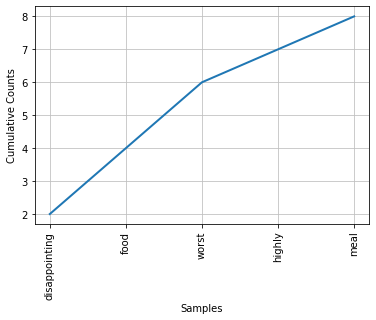

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [108]:
Low_Frequency_distribution.plot(5, cumulative=True)

In [113]:
a=pd.read_csv('/Users/priyaravichandran/Downloads/combineReviewDetails.txt')

In [130]:
file_handling = open('/Users/priyaravichandran/Downloads/combineReviewDetails.txt')

In [131]:
review_words_list=[]
for i in file_handling:
    review_words_list.append(i)
review_words_list

['Fantastic dinner at Entrenous! Pre ordered a sweet crepe for dessert but we were too full!! Will definitely be back for more! Second time back at the restaurant and the food were as good as the first time. Didn’t wait too long for the crepes to be ready. My boyfriend and I especially love the escargot - the garlicky taste is to die for! Geraldine, the owner, is very friendly and made sure that our experience was awesome. Recommend everyone to try their crepes at least once! Authentic taste and good service . ordered savoury and sweet crepe . very delicious and fresh . creme brulee was the best i ever had . its not only the food thats authentic its the staff too . staff eas very transparent in telling upfront about the wait time due to high traffic .. inspite of the risk of loosing the customer.   Recommend this 100% We had a range of savoury and sweet crepes for dinner - both were delicious! The salted butter caramel is highly recommended and you can buy a bottle for home. Service wa

In [132]:
review_words_text=' '.join(review_words_list)
print(review_words_text)

Fantastic dinner at Entrenous! Pre ordered a sweet crepe for dessert but we were too full!! Will definitely be back for more! Second time back at the restaurant and the food were as good as the first time. Didn’t wait too long for the crepes to be ready. My boyfriend and I especially love the escargot - the garlicky taste is to die for! Geraldine, the owner, is very friendly and made sure that our experience was awesome. Recommend everyone to try their crepes at least once! Authentic taste and good service . ordered savoury and sweet crepe . very delicious and fresh . creme brulee was the best i ever had . its not only the food thats authentic its the staff too . staff eas very transparent in telling upfront about the wait time due to high traffic .. inspite of the risk of loosing the customer.   Recommend this 100% We had a range of savoury and sweet crepes for dinner - both were delicious! The salted butter caramel is highly recommended and you can buy a bottle for home. Service was 

In [137]:
new_reviews_list=[]
for review in review_words_list:
    review=clean(review, no_emoji=True)
    a=re.sub('[”|“|!|@|.|$|*|&|,|"|"|/|:|)|(|-]',' ',review)
    new_reviews_list.append(a.strip())

[('delicious', 343), ('singapore', 269), ('authentic', 226), ('creperie', 216), ('restaurant', 194), ('geraldine', 189), ('friendly', 183), ('galettes', 162), ('brittany', 150), ('definitely', 149)]


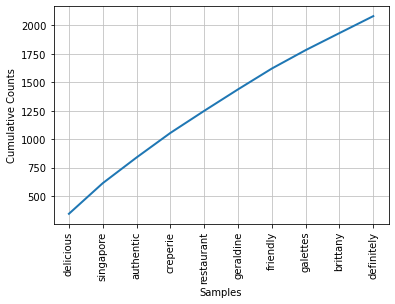

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [148]:
review_word_list=[]
new_consolidated_reviews=' '.join(new_reviews_list)
lem=WordNetLemmatizer()
review_lem_tokens=lem.lemmatize(new_consolidated_reviews.lower())
review_file_tokens = word_tokenize(review_lem_tokens)
for i in review_file_tokens:
    if len(i)>7:
        review_word_list.append(i)
review_data_count = nltk.FreqDist(review_word_list)
print(review_data_count.most_common(10))
review_data_count.plot(10, cumulative=True)

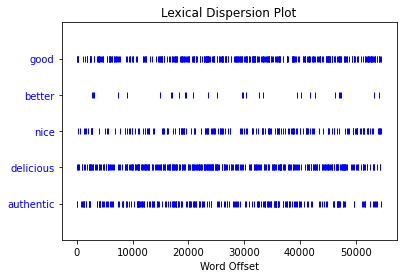

In [187]:
%matplotlib inline
from nltk import word_tokenize, Text
good_review_text = Text(review_file_tokens)
good_review_text.dispersion_plot(['good','better','nice','delicious','authentic'])

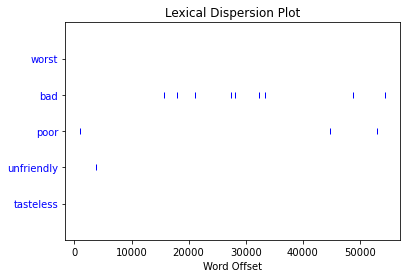

In [191]:
%matplotlib inline
from nltk import word_tokenize, Text
bad_review_text = Text(review_file_tokens)
bad_review_text.dispersion_plot(['worst','bad','poor','unfriendly','tasteless'])

In [151]:
stopwords=STOPWORDS
review_word_cloud= WordCloud(background_color='white', stopwords = stopwords, height=1000,width=1000)
review_word_cloud.generate(review_words_text)

In [152]:
review_word_cloud.to_file('review_word_cloud.png')

In [153]:
siao.polarity_scores(review_words_text)

{'neg': 0.013, 'neu': 0.652, 'pos': 0.335, 'compound': 1.0}

In [154]:
french_res_df=pd.read_csv('/Users/priyaravichandran/Downloads/cleaned_Final_Reviews_NoOwnerReviews.csv')

In [155]:
french_res_df

,title,details,reviewDate,rating
0,Rare find!!,Fantastic dinner at Entrenous! Pre ordered a s...,22 October 2022,5
1,Great food and service,Second time back at the restaurant and the foo...,16 October 2022,5
2,Excellent food .. authentic taste,Authentic taste and good service ... ordered s...,16 October 2022,5
3,Great food and service!,We had a range of savoury and sweet crepes for...,15 October 2022,5
4,🤍,Check out their daily specials on the board. I...,12 October 2022,5
...,...,...,...,...
1339,Best crepes ever,This place is run by a young French couple who...,6 August 2012,5
1340,A great little creperie,Creperie Entre -Nous is easy to miss in Seah S...,15 July 2012,5
1341,Comme en Bretagne...,As usual the crepes were excellent and well pr...,23 February 2012,5
1342,Great place,I live around the corner and I have been more ...,13 August 2011,5


In [157]:
french_res_df.to_sql('sql_table_french', conn)

1344

In [163]:
query = """select * from sql_table_french where rating in ('2','1') 
and (reviewDate like '%2018%' or reviewDate like '%2019%' or reviewDate like '%2020%' 
or reviewDate like '%2021%' or reviewDate like '%2022%')  """
low_french_restaurants_df = pd.read_sql(query, conn)

In [168]:
negative_review_list=[]
negative_review_list=low_french_restaurants_df['details'].values.tolist()

In [172]:
new_negative_reviews_list=[]
for neg_review in negative_review_list:
    neg_review=clean(neg_review, no_emoji=True)
    a=re.sub('[”|“|!|@|.|$|*|&|,|"|"|/|:|)|(|-|?]',' ',neg_review)
    new_negative_reviews_list.append(a.strip())

[('original', 2), ('creperie', 2), ('unfriendly', 1), ('experience-', 1), ('initially', 1)]


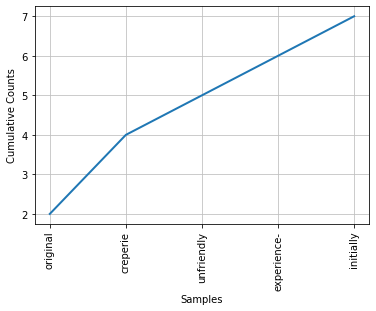

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [176]:
negative_review_word_list=[]
negative_new_consolidated_reviews=' '.join(new_negative_reviews_list)
lem=WordNetLemmatizer()
neg_review_lem_tokens=lem.lemmatize(negative_new_consolidated_reviews.lower())
neg_review_file_tokens = word_tokenize(neg_review_lem_tokens)
for i in neg_review_file_tokens:
    if len(i)>7:
        negative_review_word_list.append(i)
neg_review_data_count = nltk.FreqDist(negative_review_word_list)
print(neg_review_data_count.most_common(5))
neg_review_data_count.plot(5, cumulative=True)

In [178]:
query = """select * from sql_table_french where rating in ('4','5') 
and (reviewDate like '%2018%' or reviewDate like '%2019%' or reviewDate like '%2020%' 
or reviewDate like '%2021%' or reviewDate like '%2022%')  """
top_french_restaurants_df = pd.read_sql(query, conn)

In [179]:
positive_review_list=[]
positive_review_list=top_french_restaurants_df['details'].values.tolist()

In [180]:
new_positive_reviews_list=[]
for pos_review in positive_review_list:
    pos_review=clean(pos_review, no_emoji=True)
    a=re.sub('[”|“|!|@|.|$|*|&|,|"|"|/|:|)|(|-|?]',' ',pos_review)
    new_positive_reviews_list.append(a.strip())

[('delicious', 248), ('singapore', 184), ('authentic', 169), ('geraldine', 162), ('creperie', 138)]


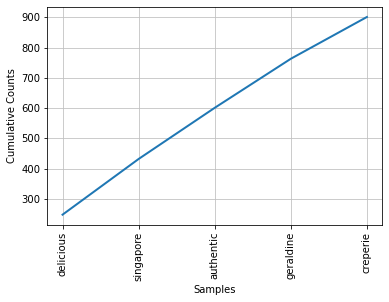

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [181]:
positive_review_word_list=[]
positive_new_consolidated_reviews=' '.join(new_positive_reviews_list)
lem=WordNetLemmatizer()
pos_review_lem_tokens=lem.lemmatize(positive_new_consolidated_reviews.lower())
pos_review_file_tokens = word_tokenize(pos_review_lem_tokens)
for i in pos_review_file_tokens:
    if len(i)>7:
        positive_review_word_list.append(i)
pos_review_data_count = nltk.FreqDist(positive_review_word_list)
print(pos_review_data_count.most_common(5))
pos_review_data_count.plot(5, cumulative=True)

In [182]:
title_list=french_res_df['title'].values.tolist()

In [183]:
title_list

['Rare find!!',
 'Great food and service',
 'Excellent food .. authentic taste',
 'Great food and service!',
 '🤍',
 'My favourite place for crepes',
 'Delicious crepes!',
 'Hungry for crepes? Look no further!',
 'Always delicious!',
 'Great Crepes',
 'Lovely lunch',
 'Great Crepes and homely environment',
 'The best crepe place in Singapore!',
 'The best truly authentic French dining experience Singapore has to offer.',
 'Gluten free paradise in Singapore',
 '周末小聚',
 'Most authentic crêpes in Singapore',
 'Delicious crepes and gallettes',
 'Entre-Nous : excellent and cozy',
 'Very nice place',
 'Excellent quality',
 'Excellent Bretagne crêpes in Singapore',
 'The best crepes in town',
 'Nice crepes',
 'A place-to-be for authentic French crepes in Singapore',
 'The Best Crepe In Town',
 'Great experience!',
 'Great Galettes and Crisp Crepes!',
 'Delicious French food with gluten free options',
 'Entre-Nous creperie',
 'Great atmosphere, amazing food!',
 'Great galattes!',
 'Delicious gl

In [184]:
new_title_list=[]
for new_title in title_list:
    new_title=clean(new_title, no_emoji=True)
    a=re.sub('[”|“|!|@|.|$|*|&|,|"|"|/|:|)|(|-|?]',' ',new_title)
    new_title_list.append(a.strip())

In [185]:
title_text=' '.join(new_title_list)

In [186]:
stopwords=STOPWORDS
review_word_cloud= WordCloud(background_color='white', stopwords = stopwords, height=1000,width=1000)
review_word_cloud.generate(title_text)
review_word_cloud.to_file('title_word_cloud.png')